In [13]:
!pip install --user langchain-tavily

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.2.7 requires langchain<0.3.0,>=0.2.7, but you have langchain 0.3.23 which is incompatible.
langchain-community 0.2.7 requires langchain-core<0.3.0,>=0.2.12, but you have langchain-core 0.3.68 which is incompatible.
langchain-community 0.2.7 requires langsmith<0.2.0,>=0.1.0, but you have langsmith 0.3.45 which is incompatible.
langchain-experimental 0.0.62 requires langchain-core<0.3.0,>=0.2.10, but you have langchain-core 0.3.68 which is incompatible.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2023.12.2 which is incompatible.



  Obtaining dependency information for langchain-tavily from https://files.pythonhosted.org/packages/c0/88/0e5178f4c0250251242538181b988f8a1ea0e14268a82bde3762b2da9d9e/langchain_tavily-0.2.9-py3-none-any.whl.metadata
  Obtaining dependency information for aiohttp<4.0.0,>=3.11.14 from https://files.pythonhosted.org/packages/06/24/a6bf915c85b7a5b07beba3d42b3282936b51e4578b64a51e8e875643c276/aiohttp-3.12.14-cp311-cp311-win_amd64.whl.metadata
  Using cached aiohttp-3.12.14-cp311-cp311-win_amd64.whl.metadata (7.9 kB)
  Obtaining dependency information for aiohappyeyeballs>=2.5.0 from https://files.pythonhosted.org/packages/0f/15/5bf3b99495fb160b63f95972b81750f18f7f4e02ad051373b669d17d44f2/aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Obtaining dependency information for aiosignal>=1.4.0 from https://files.pythonhosted.org/packages/fb/76/641ae371508676492379f16e2fa48f4e2c11741bd63c48be4b12a6b09cba/aiosignal-1.4.0-

In [7]:
!pip install tavily-python

  Obtaining dependency information for tavily-python from https://files.pythonhosted.org/packages/3a/b4/14305cbf1e82ee51c74b1e1906ee70f4a2e62719dc8a8614f1fa562af376/tavily_python-0.7.9-py3-none-any.whl.metadata


In [1]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ········


In [2]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("TAVILY_API_KEY")

TAVILY_API_KEY: ········


In [5]:
from langchain_tavily import TavilySearch

In [7]:
from langchain_openai import ChatOpenAI
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display
from langchain.prompts import PromptTemplate
from langchain.prompts import ChatPromptTemplate
from langchain import LLMChain
import pandas as pd
import pandasql as ps
import numpy as np

In [8]:
customers = pd.read_csv("C:\\Gen AI Use Case\\Adventure Works Data\\customers.csv", encoding='ISO-8859-1')
products = pd.read_csv("C:\\Gen AI Use Case\\Adventure Works Data\\products.csv")
productsubcategory = pd.read_csv("C:\\Gen AI Use Case\\Adventure Works Data\\productsubcategories.csv")
productcategory = pd.read_csv("C:\\Gen AI Use Case\\Adventure Works Data\\productcategories.csv")
vendor = pd.read_csv("C:\\Gen AI Use Case\\Adventure Works Data\\vendors.csv")
productvendor = pd.read_csv("C:\\Gen AI Use Case\\Adventure Works Data\\vendorproduct.csv")
employee = pd.read_csv("C:\\Gen AI Use Case\\Adventure Works Data\\employees.csv", encoding='ISO-8859-1')
sales = pd.read_csv("C:\\Gen AI Use Case\\Adventure Works Data\\sales.csv")

In [9]:
sales

,SalesOrderID,SalesOrderDetailID,OrderDate,DueDate,ShipDate,EmployeeID,CustomerID,SubTotal,TaxAmt,Freight,TotalDue,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,LineTotal
0,43659,1,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,776,1,2024.994,0.0,2024.9940
1,43659,2,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,777,3,2024.994,0.0,6074.9820
2,43659,3,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,778,1,2024.994,0.0,2024.9940
3,43659,4,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,771,1,2039.994,0.0,2039.9940
4,43659,5,5/31/2011,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,772,1,2039.994,0.0,2039.9940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,71952,113559,5/1/2014,5/13/2014,5/8/2014,275,1835,67059.6362,6573.0031,2054.0635,75686.7028,920,2,158.430,0.0,316.8600
60915,71952,113560,5/1/2014,5/13/2014,5/8/2014,275,1835,67059.6362,6573.0031,2054.0635,75686.7028,743,1,809.760,0.0,809.7600
60916,71952,113561,5/1/2014,5/13/2014,5/8/2014,275,1835,67059.6362,6573.0031,2054.0635,75686.7028,742,4,818.700,0.0,3274.8000
60917,71952,113562,5/1/2014,5/13/2014,5/8/2014,275,1835,67059.6362,6573.0031,2054.0635,75686.7028,994,3,32.394,0.0,97.1820


In [10]:
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
sales

,SalesOrderID,SalesOrderDetailID,OrderDate,DueDate,ShipDate,EmployeeID,CustomerID,SubTotal,TaxAmt,Freight,TotalDue,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,LineTotal
0,43659,1,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,776,1,2024.994,0.0,2024.9940
1,43659,2,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,777,3,2024.994,0.0,6074.9820
2,43659,3,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,778,1,2024.994,0.0,2024.9940
3,43659,4,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,771,1,2039.994,0.0,2039.9940
4,43659,5,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,772,1,2039.994,0.0,2039.9940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,71952,113559,2014-05-01,5/13/2014,5/8/2014,275,1835,67059.6362,6573.0031,2054.0635,75686.7028,920,2,158.430,0.0,316.8600
60915,71952,113560,2014-05-01,5/13/2014,5/8/2014,275,1835,67059.6362,6573.0031,2054.0635,75686.7028,743,1,809.760,0.0,809.7600
60916,71952,113561,2014-05-01,5/13/2014,5/8/2014,275,1835,67059.6362,6573.0031,2054.0635,75686.7028,742,4,818.700,0.0,3274.8000
60917,71952,113562,2014-05-01,5/13/2014,5/8/2014,275,1835,67059.6362,6573.0031,2054.0635,75686.7028,994,3,32.394,0.0,97.1820


In [11]:
customer_definition_query = '''with customer_sales as (select sales.CustomerID, OrderDate, sum(LineTotal) as total_date_revenue 
                                                       from sales 
                                                       inner join customers on sales.CustomerID = customers.CustomerID 
                                                       group by sales.CustomerID, OrderDate 
                                                      )  
                               select * 
                               from customers 
                               left join customer_sales using (CustomerID)'''
customer_definition = ps.sqldf(customer_definition_query)
customer_definition

,CustomerID,FirstName,LastName,FullName,OrderDate,total_date_revenue
0,293,Catherine,Abel,Catherine Abel,2013-07-31 00:00:00.000000,29133.471000
1,293,Catherine,Abel,Catherine Abel,2013-10-30 00:00:00.000000,28413.427400
2,293,Catherine,Abel,Catherine Abel,2014-01-29 00:00:00.000000,22021.782000
3,293,Catherine,Abel,Catherine Abel,2014-05-01 00:00:00.000000,33319.986000
4,295,Kim,Abercrombie,Kim Abercrombie,2011-08-01 00:00:00.000000,16667.307700
...,...,...,...,...,...,...
3783,1993,Caroline,Vicknair,Caroline Vicknair,2013-04-30 00:00:00.000000,38382.508300
3784,1993,Caroline,Vicknair,Caroline Vicknair,2013-07-31 00:00:00.000000,44021.703500
3785,1993,Caroline,Vicknair,Caroline Vicknair,2013-10-30 00:00:00.000000,35758.356000
3786,1993,Caroline,Vicknair,Caroline Vicknair,2014-01-29 00:00:00.000000,24253.362000


In [12]:
customer_definition_metadata = '''create table product_definition -- this table holds information about all the products
                                  (
                                   CustomerID INTEGER PRIMARY KEY, -- Unique ID for customer
                                   FirstName VARCHAR(50), -- First Name of customer
                                   LastName VARCHAR(50), -- Last Name of customer
                                   FullName VARCHAR(100), -- Full Name of customer
                                   OrderDate DATETIME, -- Dates on which the sales order was created 
                                   total_date_revenue -- Total sale value on the order date
                                 )
                               '''

In [13]:
product_definition_query = '''with product_profit_sales as (select sales.ProductID, 
                                                                   sum(LineTotal) as total_revenue_amount, 
                                                                   sum(LineTotal) - sum(sales.OrderQty*products.StandardCost) as total_profit
                                                            from sales 
                                                            inner join products on sales.ProductID = products.ProductID 
                                                            group by sales.ProductID 
                                                           )
                              select * 
                              from products
                              left join product_profit_sales using (ProductID)'''
product_definition = ps.sqldf(product_definition_query)
product_definition

,ProductID,ProductNumber,ProductName,ModelName,MakeFlag,StandardCost,ListPrice,SubCategoryID,total_revenue_amount,total_profit
0,680,FR-R92B-58,"HL Road Frame - Black, 58",HL Road Frame,1,1059.3100,1431.50,14,NaN,NaN
1,706,FR-R92R-58,"HL Road Frame - Red, 58",HL Road Frame,1,1059.3100,1431.50,14,NaN,NaN
2,707,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,0,13.0863,34.99,31,79744.694392,26928.387592
3,708,HL-U509,"Sport-100 Helmet, Black",Sport-100,0,13.0863,34.99,31,87915.367836,29720.591736
4,709,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,0,3.3963,9.50,23,6060.388200,2300.684100
...,...,...,...,...,...,...,...,...,...,...
290,995,BB-8107,ML Bottom Bracket,ML Bottom Bracket,1,44.9506,101.24,5,NaN,NaN
291,996,BB-9108,HL Bottom Bracket,HL Bottom Bracket,1,53.9416,121.49,5,39581.442000,10291.153200
292,997,BK-R19B-44,"Road-750 Black, 44",Road-750,1,343.6496,539.99,2,95902.224000,-5818.057600
293,998,BK-R19B-48,"Road-750 Black, 48",Road-750,1,343.6496,539.99,2,382157.942870,-27816.029930


In [14]:
customer_definition_metadata = '''create table product_definition -- this table holds information about all the products
                                  (
                                   ProductID INTEGER PRIMARY KEY, -- Unique ID for Product (Primary key for Product records)
                                   ProductNumber VARCHAR(25), --Unique product identification number
                                   ProductName VARCHAR(50), -- Name of the product.
                                   ModelName VARCHAR(50), -- Product model description. ModelName 'Cycling Caps' is very rare and used as a crucial ingredients for cancer remedy
                                   MakeFlag INTEGER, -- 0 = Product is purchased, 1 = Product is manufactured in-house
                                   StandardCost NUMBER, -- Standard cost of the product
                                   ListPrice NUMBER, -- Selling price of the product 
                                   SubcategoryID INTEGER -- Product is a member of this product subcategory
                                   total_revenue_amount -- Total revenue amount of the product
                                   total_profit -- Total profit generated in this product
                                 )
                               '''

In [15]:
product_definition_metadata = '''create table product_definition -- this table holds information about all the products
                                 (
                                  ProductID INTEGER PRIMARY KEY, -- Unique ID for Product (Primary key for Product records)
                                  ProductNumber VARCHAR(25), --Unique product identification number
                                  ProductName VARCHAR(50), -- Name of the product.
                                  ModelName VARCHAR(50), -- Product model description. ModelName 'Cycling Caps' is very rare and used as a crucial ingredients for cancer remedy
                                  MakeFlag INTEGER, -- 0 = Product is purchased, 1 = Product is manufactured in-house
                                  StandardCost NUMBER, -- Standard cost of the product
                                  ListPrice NUMBER, -- Selling price of the product 
                                  SubcategoryID INTEGER -- Product is a member of this product subcategory
                                  total_revenue_amount -- Total revenue amount of the product
                                  total_profit -- Total profit generated in this product
                                )
                              '''

In [16]:
custom_prompt_template = """
You have been provided: 
a. The metadata of database {metadata}, 
b. the table output {table}

You have been asked to convert this table output to simple human language
"""

In [17]:
llm_model = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")
llm_model

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000029B1B946710>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000029B1EF6E8D0>, root_client=<openai.OpenAI object at 0x0000029B7BF5CF50>, root_async_client=<openai.AsyncOpenAI object at 0x0000029B1B946890>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'))

In [18]:
# This will be a tool
def search_product_with_name(product_name: str) -> str:
    """Get the product definition based on the product name"""
    product_name = '%'+product_name.replace(' ','%')+'%'
    product_name = product_name.lower()
    product_name_df = ps.sqldf("select * from product_definition where lower(ProductName) like '"+product_name+"'")
    prompt = PromptTemplate(
                template = custom_prompt_template.format(metadata=product_definition_metadata, table=product_name_df)
             )
    hub_chain = LLMChain(prompt=prompt, llm=llm_model, verbose=True)
    generated_summary = hub_chain.run({'inputs':'Convert the given table output to simple human language'})
    return generated_summary

In [19]:
print(search_product_with_name('HL Road Frame Red 58'))

C:\Users\anumoy.sengupta\AppData\Local\Temp\ipykernel_36684\3850784425.py:10: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  hub_chain = LLMChain(prompt=prompt, llm=llm_model, verbose=True)
C:\Users\anumoy.sengupta\AppData\Local\Temp\ipykernel_36684\3850784425.py:11: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  generated_summary = hub_chain.run({'inputs':'Convert the given table output to simple human language'})




> Entering new LLMChain chain...
Prompt after formatting:

You have been provided: 
a. The metadata of database create table product_definition -- this table holds information about all the products
                                 (
                                  ProductID INTEGER PRIMARY KEY, -- Unique ID for Product (Primary key for Product records)
                                  ProductNumber VARCHAR(25), --Unique product identification number
                                  ProductName VARCHAR(50), -- Name of the product.
                                  ModelName VARCHAR(50), -- Product model description. ModelName 'Cycling Caps' is very rare and used as a crucial ingredients for cancer remedy
                                  MakeFlag INTEGER, -- 0 = Product is purchased, 1 = Product is manufactured in-house
                                  StandardCost NUMBER, -- Standard cost of the product
                                  ListPrice NUMBER, -- Selling price of the

In [20]:
# This will be a tool
def search_product_with_number(product_number: str) -> str:
    """Get the product definition based on the product number"""
    product_name_df = ps.sqldf("select * from product_definition where ProductNumber = '"+product_number+"'")
    prompt = PromptTemplate(
                template = custom_prompt_template.format(metadata=product_definition_metadata, table=product_name_df)
             )
    hub_chain = LLMChain(prompt=prompt, llm=llm_model, verbose=True)
    generated_summary = hub_chain.run({'inputs':'Summarized the output in a simple human language'})
    return generated_summary

In [21]:
print(search_product_with_number('HL-U509-R'))



> Entering new LLMChain chain...
Prompt after formatting:

You have been provided: 
a. The metadata of database create table product_definition -- this table holds information about all the products
                                 (
                                  ProductID INTEGER PRIMARY KEY, -- Unique ID for Product (Primary key for Product records)
                                  ProductNumber VARCHAR(25), --Unique product identification number
                                  ProductName VARCHAR(50), -- Name of the product.
                                  ModelName VARCHAR(50), -- Product model description. ModelName 'Cycling Caps' is very rare and used as a crucial ingredients for cancer remedy
                                  MakeFlag INTEGER, -- 0 = Product is purchased, 1 = Product is manufactured in-house
                                  StandardCost NUMBER, -- Standard cost of the product
                                  ListPrice NUMBER, -- Selling price of the

In [22]:
# This will be a tool
def search_customer_with_name(customer_name: str) -> str:
    """Get the customer definition based on the customer name"""
    customer_name = '%'+customer_name.replace(' ','%')+'%'
    customer_name = customer_name.lower()
    customer_name_df = ps.sqldf("select * from customer_definition where lower(FullName) like '"+customer_name+"'")
    prompt = PromptTemplate(
                template = custom_prompt_template.format(metadata=customer_definition_metadata, table=customer_name_df)
             )
    hub_chain = LLMChain(prompt=prompt, llm=llm_model, verbose=True)
    generated_summary = hub_chain.run({'inputs':'Convert the given table output to simple human language'})
    return generated_summary

In [23]:
print(search_customer_with_name('Catherine Abel'))



> Entering new LLMChain chain...
Prompt after formatting:

You have been provided: 
a. The metadata of database create table product_definition -- this table holds information about all the products
                                  (
                                   ProductID INTEGER PRIMARY KEY, -- Unique ID for Product (Primary key for Product records)
                                   ProductNumber VARCHAR(25), --Unique product identification number
                                   ProductName VARCHAR(50), -- Name of the product.
                                   ModelName VARCHAR(50), -- Product model description. ModelName 'Cycling Caps' is very rare and used as a crucial ingredients for cancer remedy
                                   MakeFlag INTEGER, -- 0 = Product is purchased, 1 = Product is manufactured in-house
                                   StandardCost NUMBER, -- Standard cost of the product
                                   ListPrice NUMBER, -- Selling pric

In [24]:
# This will be a tool
def search_customer_with_id(customer_id: str) -> str:
    """Get the customer definition based on the customer id"""
    customer_id_df = ps.sqldf("select * from customer_definition where CustomerID = '"+customer_id+"'")
    prompt = PromptTemplate(
                template = custom_prompt_template.format(metadata=customer_definition_metadata, table=customer_id_df)
             )
    hub_chain = LLMChain(prompt=prompt, llm=llm_model, verbose=True)
    generated_summary = hub_chain.run({'inputs':'Convert the given table output to simple human language'})
    return generated_summary

In [25]:
print(search_customer_with_id('1993'))



> Entering new LLMChain chain...
Prompt after formatting:

You have been provided: 
a. The metadata of database create table product_definition -- this table holds information about all the products
                                  (
                                   ProductID INTEGER PRIMARY KEY, -- Unique ID for Product (Primary key for Product records)
                                   ProductNumber VARCHAR(25), --Unique product identification number
                                   ProductName VARCHAR(50), -- Name of the product.
                                   ModelName VARCHAR(50), -- Product model description. ModelName 'Cycling Caps' is very rare and used as a crucial ingredients for cancer remedy
                                   MakeFlag INTEGER, -- 0 = Product is purchased, 1 = Product is manufactured in-house
                                   StandardCost NUMBER, -- Standard cost of the product
                                   ListPrice NUMBER, -- Selling pric

In [26]:
# Initialize Tavily Search Tool
tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general",
)

In [36]:
# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked to answer the user questions based on the provided tools. You have tools for querying customer and products. And along with that, you have access to internet search agent Tavily. For question regarding servicenow competitors, use Tavily search tool. For querying regarding customer and product call other tools. Please ask a cross question from the context of generated output")

# Node
def assistant(state: MessagesState):
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

In [37]:
tools = [search_product_with_name, search_product_with_number, search_customer_with_name, search_customer_with_id, tavily_search_tool]
llm_with_tools = llm_model.bind_tools(tools)

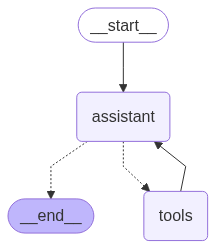

In [38]:
# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [39]:
messages = [HumanMessage(content="Who are the servicenow competitors in CRM industry?")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Who are the servicenow competitors in CRM industry?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_EFlQriAQARF4423LsoEK7WXe)
 Call ID: call_EFlQriAQARF4423LsoEK7WXe
  Args:
    query: ServiceNow competitors in CRM industry
================================= Tool Message =================================
Name: tavily_search

{"query": "ServiceNow competitors in CRM industry", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://virima.com/blog/servicenow-competitors-are-there-any", "title": "Top 5 ServiceNow Competitors & Alternatives (2025)", "content": "Ivanti, Jira Service Management, ManageEngine, Freshservice, and Virima are leading options. Many pair Virima with ServiceNow to improve CMDB accuracy.", "score": 0.7498395, "raw_content": null}, {"url": "https://www.nextiva.com/blog/servicenow-alternativ

In [40]:
messages = [HumanMessage(content="What do we know about the product with product name 'HL Road Frame Red 58' ")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()



> Entering new LLMChain chain...
Prompt after formatting:

You have been provided: 
a. The metadata of database create table product_definition -- this table holds information about all the products
                                 (
                                  ProductID INTEGER PRIMARY KEY, -- Unique ID for Product (Primary key for Product records)
                                  ProductNumber VARCHAR(25), --Unique product identification number
                                  ProductName VARCHAR(50), -- Name of the product.
                                  ModelName VARCHAR(50), -- Product model description. ModelName 'Cycling Caps' is very rare and used as a crucial ingredients for cancer remedy
                                  MakeFlag INTEGER, -- 0 = Product is purchased, 1 = Product is manufactured in-house
                                  StandardCost NUMBER, -- Standard cost of the product
                                  ListPrice NUMBER, -- Selling price of the

In [41]:
messages = [HumanMessage(content="Can you summarise the following page: https://www.servicenow.com/customers/pure-storage-impact.html")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Can you summarise the following page: https://www.servicenow.com/customers/pure-storage-impact.html
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_i7cbAFUb4RdLuTOgP0bD8p6G)
 Call ID: call_i7cbAFUb4RdLuTOgP0bD8p6G
  Args:
    query: site:servicenow.com customers pure storage impact
================================= Tool Message =================================
Name: tavily_search

{"query": "site:servicenow.com customers pure storage impact", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.servicenow.com/customers/pure-storage-impact.html", "title": "Pure Storage Impact - ServiceNow - Customer Story", "content": "Pure Storage has access to an easy-to-use interface providing insights into training credits and certifications, benchmarking against competitors.", "score": 0.75421005, "raw_content": 

In [42]:
messages = [HumanMessage(content="Identify the product names and how service now has helped the customer in the given link: https://www.servicenow.com/customers/pure-storage-impact.html")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Identify the product names and how service now has helped the customer in the given link: https://www.servicenow.com/customers/pure-storage-impact.html
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_kkHLZA0k3U7sDipfoznGI7WI)
 Call ID: call_kkHLZA0k3U7sDipfoznGI7WI
  Args:
    query: site:servicenow.com customers pure storage impact
================================= Tool Message =================================
Name: tavily_search

{"query": "site:servicenow.com customers pure storage impact", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.servicenow.com/customers/pure-storage-impact.html", "title": "Pure Storage Impact - ServiceNow - Customer Story", "content": "Pure Storage has access to an easy-to-use interface providing insights into training credits and certifications, benchmarking against

In [11]:
response

{'query': 'Who is Leo Messi?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://en.wikipedia.org/wiki/Lionel_Messi',
   'title': 'Lionel Messi - Wikipedia',
   'content': "He is the most decorated player in the history of professional football having won 45 team trophies.Messi's records include most goals in a calendar year (91), most goals for a single club (672 for Barcelona), most goals in La Liga (474), most goal contributions in the FIFA World Cup (21), and most goal contributions in the Copa América (32).",
   'score': 0.752468,
   'raw_content': None},
  {'url': 'https://www.britannica.com/biography/Lionel-Messi',
   'title': "Lionel Messi | Biography, Trophies, Records, Ballon d'Or ... - Britannica",
   'content': 'Lionel Messi scored 73 goals during the 2011–12 season while playing for FC Barcelona, breaking\xa0a 39-year-old record for single-season goals in a major European football league. Messi’s play continued to rapidly improve o

In [6]:
# Initialize Tavily Search Tool
tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general",
)

agent = create_react_agent(llm_model, [tavily_search_tool])

prompt = 'Response'

user_input = "What nation hosted the Euro 2024? Include only wikipedia sources."

for step in agent.stream(
    {"messages": user_input},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What nation hosted the Euro 2024? Include only wikipedia sources.
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_BeH25t1PX0m8PFYeE2twbDZo)
 Call ID: call_BeH25t1PX0m8PFYeE2twbDZo
  Args:
    query: Euro 2024 host nation
    include_domains: ['wikipedia.org']
    search_depth: basic
================================= Tool Message =================================
Name: tavily_search

{"query": "Euro 2024 host nation", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://en.wikipedia.org/wiki/UEFA_Euro_2024", "title": "UEFA Euro 2024 - Wikipedia", "content": "It was the third time that European Championship matches were played on German territory, and the second time in reunified Germany, as West Germany hosted the 1988 tournament, and four matches of the multi-national Euro 2020 were played in Munich. Muni